# Aplicativo de Predição de Diabetes

## Descrição do Projeto

Este projeto tem como objetivo desenvolver um aplicativo para prever o diagnóstico de diabetes com base em indicadores de saúde. Ele utiliza o "Diabetes Health Indicators Dataset" disponível no Kaggle.

**Conjunto de Dados:** [https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

**Nome do arquivo:** diabetes_binary_health_indicators_BRFSS2015.csv


## Equipe do Projeto

- Gabriel Araujo de Padua
- Marlon Vinicius de Souza
- Matheus Oliveira Mancio


## Informações sobre o Conjunto de Dados

- **Qtde de Atributos:** 22
- **Qtde de exemplos:** 253.680
- **Valores Ausentes:** Não
- **Classes:**
    - 0: Ausência de diabetes
    - 1: Presença de diabetes
- **Distribuição de Classe:**
    - Classe 0: 86,06%
    - Classe 1: 13,94%

# Pré-processamento: carregando os dados

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os 
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [12]:
df = pd.read_csv(f'./diabetes_binary_health_indicators.csv', sep=',')
df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

## Pré-processamento: eliminação de atributos irrelevantes

Escolhemos as colunas AnyHealthcare, NoDocbcCost, Education, Income para serem removidas pois elas não interferem diretamente na saúde da pessoa e são irrelevantes para a predição da diabetes

In [13]:
df = df.drop(columns=['AnyHealthcare','NoDocbcCost','Education','Income'])
display(df.head(n=5))

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           0.0     0.0      1.0                0.0   
1                   0.0           1.0     0.0      0.0                0.0   
2                   0.0           0.0     1.0      0.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  
0      5.0      18.0      15.0       1.0  0.0   9.0  
1      3.0       0.0       0.0       0.0  0.0   7.0  
2      5.0      30.0      30.0       1.0  0.0   9.0  
3      2.0       0.0       0.0       0.0  0.0  11.0  
4      2.0       3.0       0.0       0.0  0.0  11.0

## Pré-processamento: reordenação da classe

In [14]:
# Reordena o dataframe para que a classe 'Diabetes_binary' seja a última coluna
df = df[[c for c in df if c not in ['Diabetes_binary']] + ['Diabetes_binary']]

df.head()

HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       1.0        1.0  40.0     1.0     0.0                   0.0   
1     0.0       0.0        0.0  25.0     1.0     0.0                   0.0   
2     1.0       1.0        1.0  28.0     0.0     0.0                   0.0   
3     1.0       0.0        1.0  27.0     0.0     0.0                   0.0   
4     1.0       1.0        1.0  24.0     0.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0           0.0     0.0      1.0                0.0      5.0      18.0   
1           1.0     0.0      0.0                0.0      3.0       0.0   
2           0.0     1.0      0.0                0.0      5.0      30.0   
3           1.0     1.0      1.0                0.0      2.0       0.0   
4           1.0     1.0      1.0                0.0      2.0       3.0   

   PhysHlth  DiffWalk  Sex   Age  Diabetes_binary  
0      15.0       1.0  0.0   9.0              0.0  
1       0.0       0.0  0.0   7.0              0.0  
2      30.0       1.0  0.0   9.0              0.0  
3       0.0       0.0  0.0  11.0              0.0  
4       0.0       0.0  0.0  11.0              0.0

## Pré-processamento: tratamento de atributos com valores ausentes

In [15]:
# Índices das linhas que contém valores NaN
idxRowNan = pd.isnull(df).any(axis=1).to_numpy().nonzero()

if len(idxRowNan[0]) > 0:
  print(f'Linhas com valores ausentes no dataset:')
  display(df.iloc[idxRowNan])
else:
  print('Não há valores ausentes no dataset!')

Não há valores ausentes no dataset!


Após análise verificou que não possui atributos com valores ausentes

## Pré-processamento: tratamento de dados inconsistentes ou redundantes

In [16]:
df_duplicates = df[ df.duplicated(subset=['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age'],keep=False)]

# se houver valores redundantes ou inconsistentes, imprima
if len(df_duplicates)>0:
    print('\nAmostras redundantes ou inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem valores duplicados')


Amostras redundantes ou inconsistentes:


HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
3          1.0       0.0        1.0  27.0     0.0     0.0   
5          1.0       1.0        1.0  25.0     1.0     0.0   
10         0.0       0.0        1.0  25.0     1.0     0.0   
16         1.0       1.0        1.0  21.0     0.0     0.0   
17         0.0       0.0        1.0  23.0     1.0     0.0   
...        ...       ...        ...   ...     ...     ...   
253655     0.0       0.0        1.0  28.0     0.0     0.0   
253656     0.0       0.0        1.0  25.0     0.0     0.0   
253672     1.0       0.0        1.0  30.0     1.0     0.0   
253674     0.0       0.0        1.0  27.0     0.0     0.0   
253677     0.0       0.0        1.0  28.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
3                        0.0           1.0     1.0      1.0   
5                        0.0           1.0     1.0      1.0   
10                       0.0           1.0     1.0      1.0   
16                       0.0           1.0     1.0      1.0   
17                       0.0           1.0     0.0      0.0   
...                      ...           ...     ...      ...   
253655                   0.0           1.0     1.0      1.0   
253656                   0.0           1.0     1.0      1.0   
253672                   1.0           1.0     1.0      1.0   
253674                   0.0           0.0     0.0      1.0   
253677                   0.0           1.0     1.0      0.0   

        HvyAlcoholConsump  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
3                     0.0      2.0       0.0       0.0       0.0  0.0  11.0   
5                     0.0      2.0       0.0       2.0       0.0  1.0  10.0   
10                    0.0      3.0       0.0       0.0       0.0  1.0  13.0   
16                    0.0      3.0       0.0       0.0       0.0  0.0  10.0   
17                    0.0      2.0       0.0       0.0       0.0  1.0   7.0   
...                   ...      ...       ...       ...       ...  ...   ...   
253655                0.0      2.0       0.0       0.0       0.0  0.0   2.0   
253656                1.0      1.0       0.0       0.0       0.0  0.0   4.0   
253672                0.0      3.0       0.0       0.0       0.0  1.0  12.0   
253674                0.0      1.0       0.0       0.0       0.0  0.0   3.0   
253677                0.0      1.0       0.0       0.0       0.0  0.0   2.0   

        Diabetes_binary  
3                   0.0  
5                   0.0  
10                  1.0  
16                  0.0  
17                  1.0  
...                 ...  
253655              0.0  
253656              0.0  
253672              0.0  
253674              0.0  
253677              0.0  

[93647 rows x 18 columns]

Foi encontrado um total de 93647 amostras redundantes ou inconsistentes

In [17]:
def delDuplicatas(df):
   '''
   Para cada grupo de amostras duplicadas, mantém uma e apaga as demais
   '''

   # remove as amostras duplicadas, mantendo apenas a primeira ocorrencia
   df = df.drop_duplicates(keep = 'first')

   return df

df = delDuplicatas(df)

display(df)

HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0          1.0       1.0        1.0  40.0     1.0     0.0   
1          0.0       0.0        0.0  25.0     1.0     0.0   
2          1.0       1.0        1.0  28.0     0.0     0.0   
3          1.0       0.0        1.0  27.0     0.0     0.0   
4          1.0       1.0        1.0  24.0     0.0     0.0   
...        ...       ...        ...   ...     ...     ...   
253673     1.0       0.0        1.0  42.0     0.0     0.0   
253675     1.0       1.0        1.0  45.0     0.0     0.0   
253676     1.0       1.0        1.0  18.0     0.0     0.0   
253678     1.0       0.0        1.0  23.0     0.0     0.0   
253679     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
0                        0.0           0.0     0.0      1.0   
1                        0.0           1.0     0.0      0.0   
2                        0.0           0.0     1.0      0.0   
3                        0.0           1.0     1.0      1.0   
4                        0.0           1.0     1.0      1.0   
...                      ...           ...     ...      ...   
253673                   0.0           1.0     1.0      1.0   
253675                   0.0           0.0     1.0      1.0   
253676                   0.0           0.0     0.0      0.0   
253678                   0.0           0.0     1.0      1.0   
253679                   1.0           1.0     1.0      0.0   

        HvyAlcoholConsump  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
0                     0.0      5.0      18.0      15.0       1.0  0.0   9.0   
1                     0.0      3.0       0.0       0.0       0.0  0.0   7.0   
2                     0.0      5.0      30.0      30.0       1.0  0.0   9.0   
3                     0.0      2.0       0.0       0.0       0.0  0.0  11.0   
4                     0.0      2.0       3.0       0.0       0.0  0.0  11.0   
...                   ...      ...       ...       ...       ...  ...   ...   
253673                0.0      3.0      14.0       4.0       0.0  1.0   3.0   
253675                0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676                0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253678                0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679                0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Diabetes_binary  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
...                 ...  
253673              0.0  
253675              0.0  
253676              1.0  
253678              0.0  
253679              1.0  

[188455 rows x 18 columns]

In [18]:
# Para detectar inconsistências, a rotina abaixo obtém as amostras onde os valores dos atributos continuam duplicados
# Neste caso, os atributos serão iguais, mas as classes serão distintas
df_duplicates = df[df.duplicated(subset=['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age'], keep=False)]

# Se tiver valores inconsistentes, imprime
if len(df_duplicates) > 0:
  print('Amostras inconsistentes:')
  display(df_duplicates)
else:
  print('Não existem mostras inconsistentes')

Amostras inconsistentes:


HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
3          1.0       0.0        1.0  27.0     0.0     0.0   
10         0.0       0.0        1.0  25.0     1.0     0.0   
16         1.0       1.0        1.0  21.0     0.0     0.0   
17         0.0       0.0        1.0  23.0     1.0     0.0   
23         1.0       0.0        1.0  27.0     0.0     0.0   
...        ...       ...        ...   ...     ...     ...   
253427     1.0       1.0        1.0  29.0     0.0     0.0   
253448     1.0       1.0        1.0  30.0     0.0     0.0   
253485     0.0       1.0        1.0  29.0     0.0     0.0   
253510     0.0       0.0        1.0  40.0     1.0     0.0   
253521     1.0       0.0        1.0  29.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  \
3                        0.0           1.0     1.0      1.0   
10                       0.0           1.0     1.0      1.0   
16                       0.0           1.0     1.0      1.0   
17                       0.0           1.0     0.0      0.0   
23                       0.0           1.0     1.0      1.0   
...                      ...           ...     ...      ...   
253427                   0.0           1.0     0.0      1.0   
253448                   0.0           1.0     1.0      1.0   
253485                   0.0           1.0     1.0      1.0   
253510                   0.0           0.0     0.0      1.0   
253521                   0.0           0.0     1.0      1.0   

        HvyAlcoholConsump  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
3                     0.0      2.0       0.0       0.0       0.0  0.0  11.0   
10                    0.0      3.0       0.0       0.0       0.0  1.0  13.0   
16                    0.0      3.0       0.0       0.0       0.0  0.0  10.0   
17                    0.0      2.0       0.0       0.0       0.0  1.0   7.0   
23                    0.0      1.0       0.0       0.0       0.0  0.0  13.0   
...                   ...      ...       ...       ...       ...  ...   ...   
253427                0.0      3.0       0.0       0.0       1.0  0.0  10.0   
253448                0.0      3.0       0.0       0.0       0.0  1.0   5.0   
253485                0.0      4.0       0.0       0.0       0.0  0.0   7.0   
253510                0.0      3.0       0.0       0.0       0.0  0.0   7.0   
253521                0.0      3.0       0.0       0.0       0.0  0.0   8.0   

        Diabetes_binary  
3                   0.0  
10                  1.0  
16                  0.0  
17                  1.0  
23                  1.0  
...                 ...  
253427              0.0  
253448              1.0  
253485              0.0  
253510              1.0  
253521              1.0  

[10718 rows x 18 columns]

Foi encontrado 10718 amostras inconsistentes

In [19]:
def delInconsistencias(df):
   '''
   Remove todas as amostras inconsistentes da base de dados
   '''

   df = df.drop_duplicates(subset=['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age'], keep = False)
   return df

df = delInconsistencias(df)

# obtém apenas as amostras onde os valores dos atributos estão duplicados
df_duplicates = df[ df.duplicated(subset=['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age'],keep=False)]

# se tiver valores redundantes ou inconsistentes, imprime
if len(df_duplicates)>0:
   display(df_duplicates)
else:
   print('Não existem amostras redundantes ou inconsistentes')

Não existem amostras redundantes ou inconsistentes


In [20]:
# Apresenta as principais estatísticas da base de dados
df.describe()

HighBP       HighChol      CholCheck            BMI  \
count  177737.000000  177737.000000  177737.000000  177737.000000   
mean        0.470819       0.456748       0.951237      29.138474   
std         0.499149       0.498127       0.215373       7.300842   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      28.000000   
75%         1.000000       1.000000       1.000000      32.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  177737.000000  177737.000000         177737.000000  177737.000000   
mean        0.485301       0.056977              0.122974       0.687707   
std         0.499785       0.231800              0.328408       0.463430   
min         0.000000       0.000000              0.000000       0.000000   
25%         0.000000       0.000000              0.000000       0.000000   
50%         0.000000       0.000000              0.000000       1.000000   
75%         1.000000       0.000000              0.000000       1.000000   
max         1.000000       1.000000              1.000000       1.000000   

              Fruits        Veggies  HvyAlcoholConsump        GenHlth  \
count  177737.000000  177737.000000      177737.000000  177737.000000   
mean        0.581128       0.763313           0.073530       2.736915   
std         0.493376       0.425050           0.261005       1.096987   
min         0.000000       0.000000           0.000000       1.000000   
25%         0.000000       1.000000           0.000000       2.000000   
50%         1.000000       1.000000           0.000000       3.000000   
75%         1.000000       1.000000           0.000000       3.000000   
max         1.000000       1.000000           1.000000       5.000000   

            MentHlth       PhysHlth       DiffWalk            Sex  \
count  177737.000000  177737.000000  177737.000000  177737.000000   
mean        4.453963       5.916860       0.231876       0.431176   
std         8.467866       9.809411       0.422032       0.495242   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         4.000000       7.000000       0.000000       1.000000   
max        30.000000      30.000000       1.000000       1.000000   

                 Age  Diabetes_binary  
count  177737.000000    177737.000000  
mean        8.001603         0.157756  
std         3.118758         0.364513  
min         1.000000         0.000000  
25%         6.000000         0.000000  
50%         8.000000         0.000000  
75%        10.000000         0.000000  
max        13.000000         1.000000

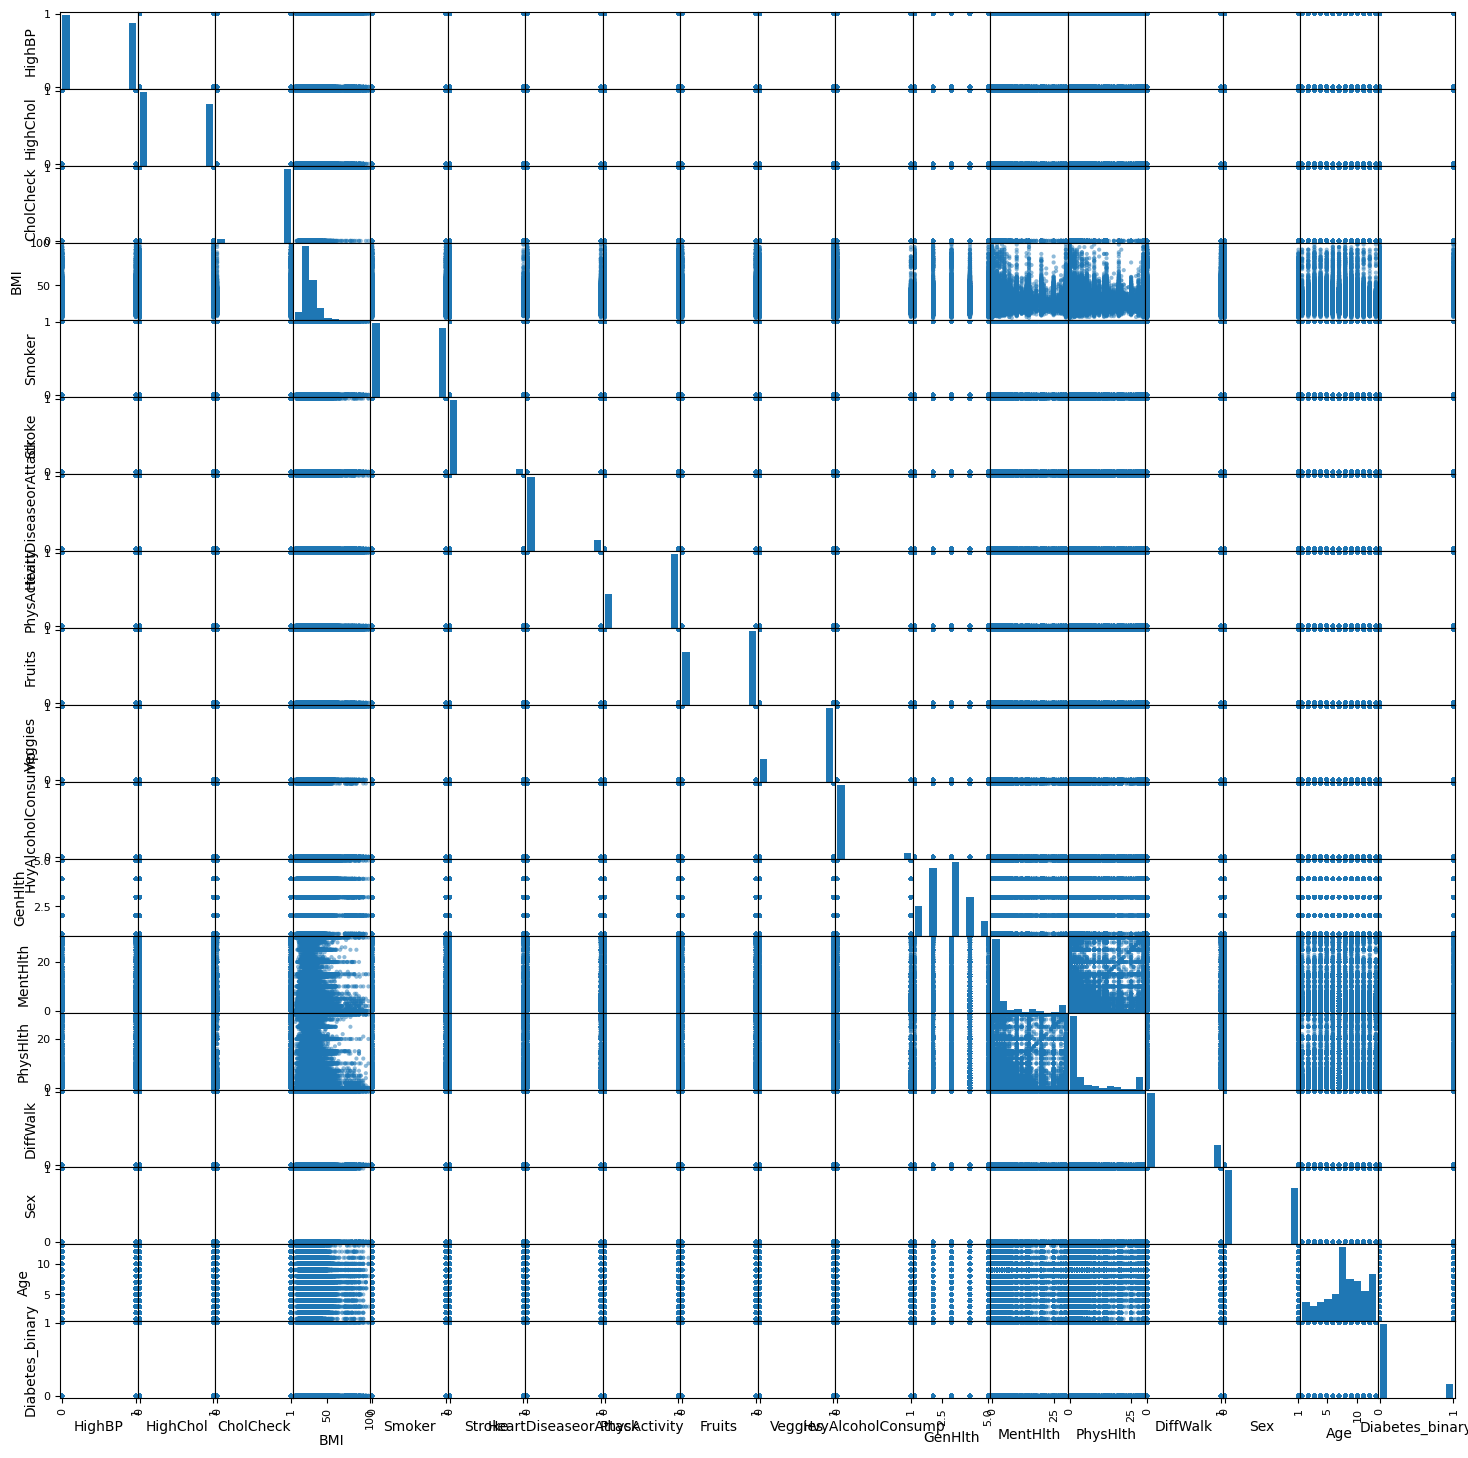

In [14]:
pd.plotting.scatter_matrix(df, figsize=(18,18))
plt.show()

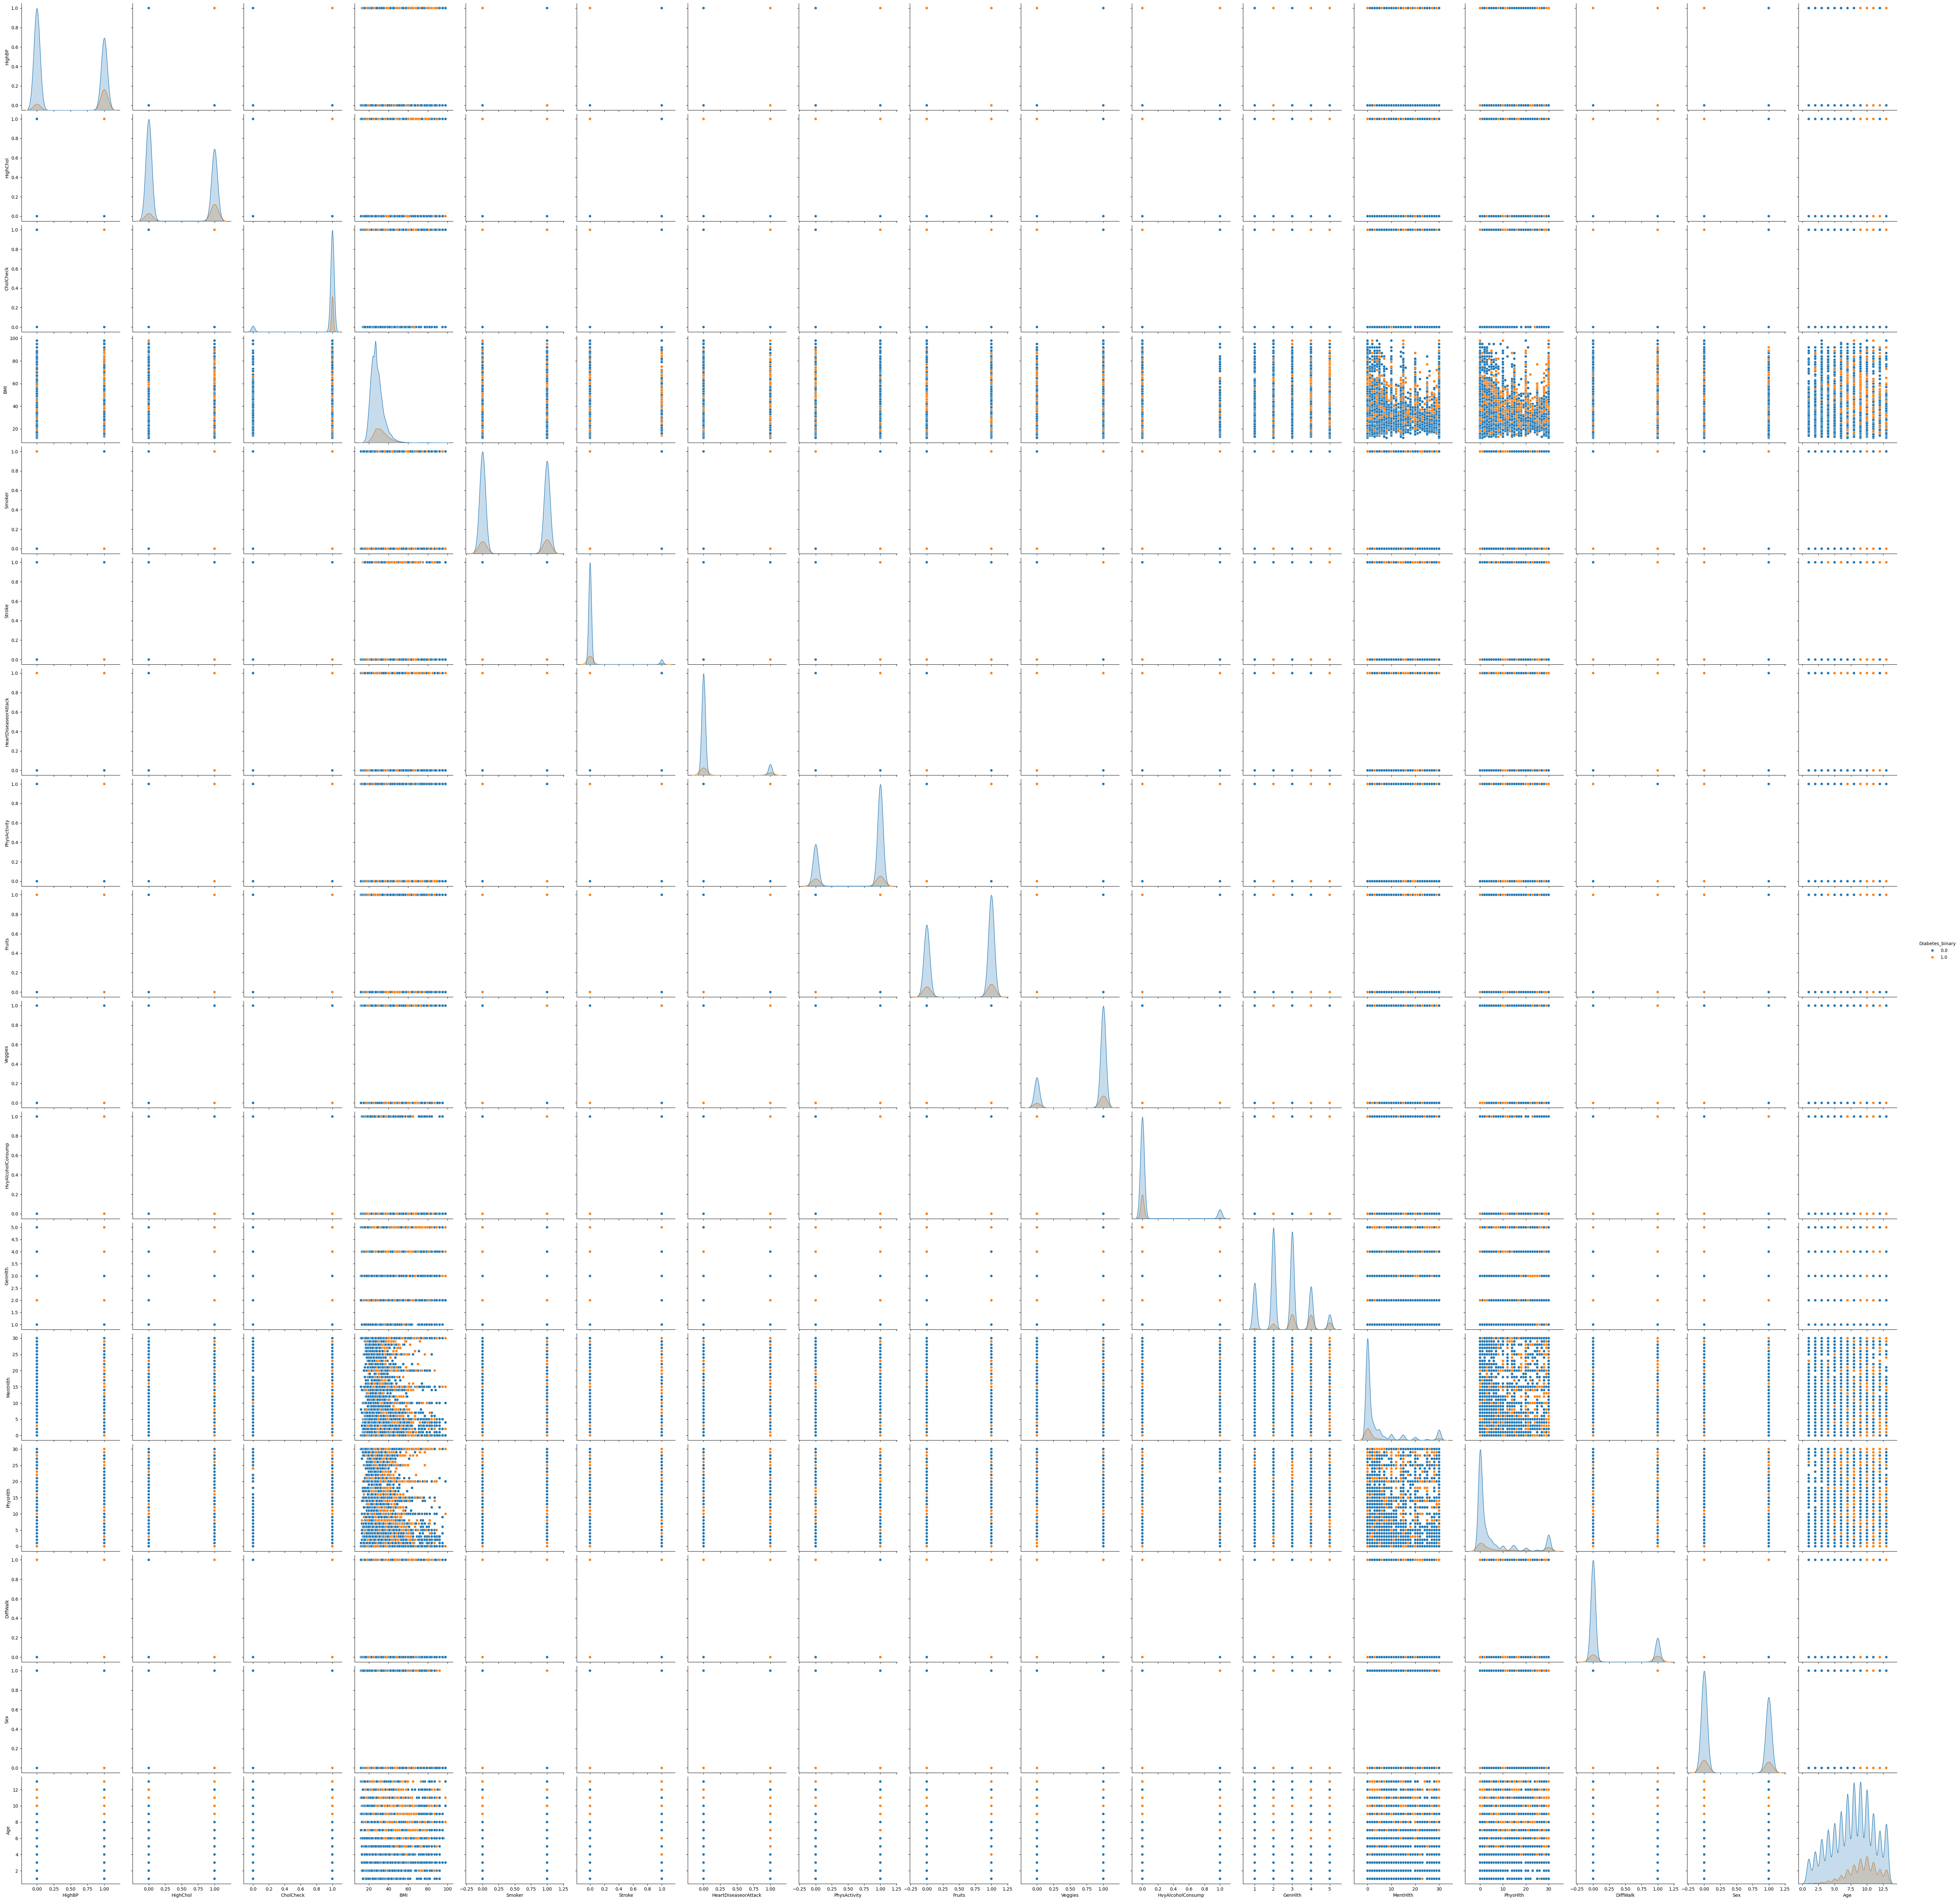

In [ ]:
# matriz de gráficos scatter
sns.pairplot(df, hue='Diabetes_binary', height=3.5);

# mostra o gráfico usando a função show() da matplotlib
plt.show() 


## Pré-processamento: normalização dos atributos

Adição de colunas continuas para normalização

In [21]:
continuous_cols = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age']

In [22]:
def normalizar(X):
   """
   Normaliza os atributos em X

   Esta função retorna uma versao normalizada de X onde o valor da
   média de cada atributo é igual a 0 e desvio padrao é igual a 1. Trata-se de
   um importante passo de pré-processamento quando trabalha-se com
   métodos de aprendizado de máquina.
   """

   m, n = X.shape # m = qtde de objetos e n = qtde de atributos por objeto

   # Incializa as variaves de saída
   X_norm = np.random.rand(m,n) # inicializa X_norm com valores aleatórios
   mu = 0 # inicializa a média
   sigma = 1 # inicializa o desvio padrão

   mu = np.mean(X, axis=0)
   sigma = np.std(X, axis=0, ddof=1)

   for i in range(m):
       X_norm[i,:] = (X[i,:]-mu) / sigma


   return X_norm, mu, sigma


# coloca os valores dos atributos na variável X
X = df[continuous_cols].values # Extrai valores das colunas contínuas para normalização

# chama a função para normalizar X
X_norm, mu, sigma = normalizar(X)

df[continuous_cols] = X_norm # Atualiza as colunas contínuas no DataFrame original com os valores normalizados

print('\nPrimeira amostra da base antes da normalização: [%2.4f %2.4f].' %(X[0,0],X[0,1]))
print('\nPrimeira amostra da base após normalização: [%2.4f %2.4f].' %(X_norm[0,0],X_norm[0,1]))


Primeira amostra da base antes da normalização: [40.0000 5.0000].

Primeira amostra da base após normalização: [1.4877 2.0630].


## Pré-processamento: detecção de *outliers*

Para detecção dos outliers foi passado somente a a colunas continuas pois somente elas que podem ter algum dado fora do padrão

In [23]:
def removeOutliers(df):
  """
  Remove os outliers da base de dados, considerando os atributos contínuos definidos anteriormente
  """

  for atributo in continuous_cols:
    # Obtem o terceiro e o primeiro quartil.
    q75, q25 = np.percentile(df[atributo].values, [75 ,25])
    # Calcula o IQR
    IQR = q75 - q25
    # Remove os outliers com base no valor do IQR
    df = df[ (df[atributo]<=(q75+1.5*IQR)) & (df[atributo]>=(q25-1.5*IQR)) ]

  return df

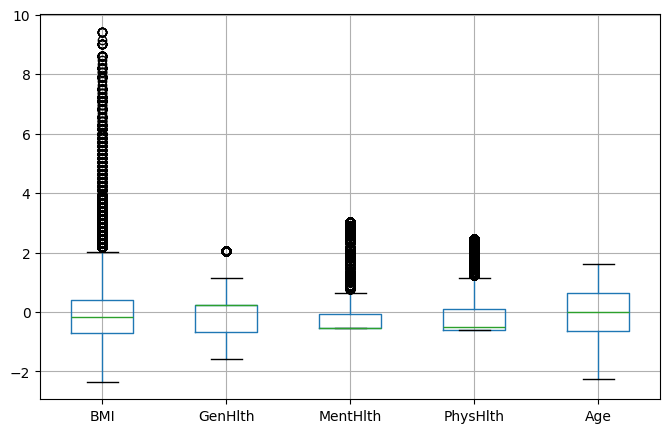

In [24]:
# Gera um bloxplot para cada atributo numérico contínuo
df.boxplot(figsize=(8,5), column=continuous_cols)
plt.show()

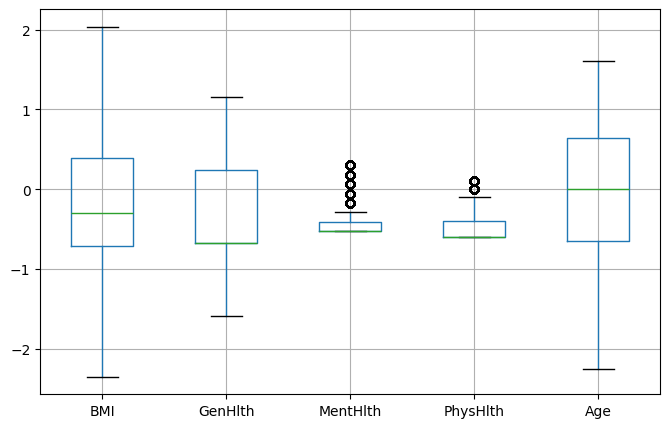

In [25]:
df = removeOutliers(df) # Remove os outliers

# Gera um bloxplot para numérico contínuo
df.boxplot(figsize=(8,5), column=continuous_cols)
plt.show()

In [26]:
# Exibe as caracteristicas da base de dados após a remoção dos outliers
df.describe()

HighBP       HighChol      CholCheck            BMI  \
count  116456.000000  116456.000000  116456.000000  116456.000000   
mean        0.429330       0.427853       0.942553      -0.133074   
std         0.494983       0.494769       0.232695       0.763399   
min         0.000000       0.000000       0.000000      -2.347466   
25%         0.000000       0.000000       1.000000      -0.703819   
50%         0.000000       0.000000       1.000000      -0.292908   
75%         1.000000       1.000000       1.000000       0.391945   
max         1.000000       1.000000       1.000000       2.035591   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  116456.000000  116456.000000         116456.000000  116456.000000   
mean        0.455812       0.043673              0.098879       0.731160   
std         0.498046       0.204368              0.298500       0.443358   
min         0.000000       0.000000              0.000000       0.000000   
25%         0.000000       0.000000              0.000000       0.000000   
50%         0.000000       0.000000              0.000000       1.000000   
75%         1.000000       0.000000              0.000000       1.000000   
max         1.000000       1.000000              1.000000       1.000000   

              Fruits        Veggies  HvyAlcoholConsump        GenHlth  \
count  116456.000000  116456.000000      116456.000000  116456.000000   
mean        0.583259       0.763593           0.082847      -0.319968   
std         0.493021       0.424877           0.275652       0.817483   
min         0.000000       0.000000           0.000000      -1.583350   
25%         0.000000       1.000000           0.000000      -0.671762   
50%         1.000000       1.000000           0.000000      -0.671762   
75%         1.000000       1.000000           0.000000       0.239825   
max         1.000000       1.000000           1.000000       1.151413   

            MentHlth       PhysHlth       DiffWalk            Sex  \
count  116456.000000  116456.000000  116456.000000  116456.000000   
mean       -0.416918      -0.493476       0.127190       0.459779   
std         0.202929       0.185653       0.333187       0.498382   
min        -0.525984      -0.603182       0.000000       0.000000   
25%        -0.525984      -0.603182       0.000000       0.000000   
50%        -0.525984      -0.603182       0.000000       0.000000   
75%        -0.407891      -0.399296       0.000000       1.000000   
max         0.300670       0.110418       1.000000       1.000000   

                 Age  Diabetes_binary  
count  116456.000000    116456.000000  
mean       -0.019011         0.119204  
std         1.022950         0.324030  
min        -2.244997         0.000000  
25%        -0.641795         0.000000  
50%        -0.000514         0.000000  
75%         0.640767         0.000000  
max         1.602688         1.000000

Após a remoção dos outliers foi verificado que restaram um total de 116456 amostras

## Pré-processamento: distribuição das classes

Diabetes_binary
0.0    102574
1.0     13882
Name: count, dtype: int64

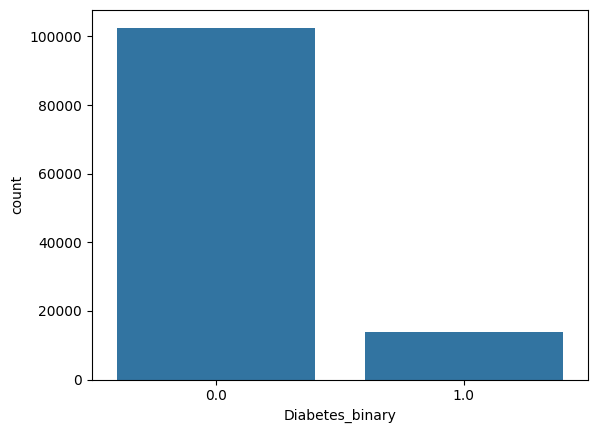

In [27]:
display(df['Diabetes_binary'].value_counts())

# Cria um gráfico de barras com a frequência de cada classe
sns.countplot(x='Diabetes_binary', data=df)
plt.show()

## Pré-processamento: correlação entre os atributos

In [28]:
# Filtra apenas as colunas numéricas
df_values = df.drop(columns=['Diabetes_binary']).select_dtypes(include=[np.number])

# Matriz de correlação
df_correlation = df_values.corr()

print('Matriz de correlação: ')
display(df_correlation)

Matriz de correlação: 


HighBP  HighChol  CholCheck       BMI    Smoker  \
HighBP                1.000000  0.235035   0.127800  0.191029  0.058390   
HighChol              0.235035  1.000000   0.112201  0.083003  0.052227   
CholCheck             0.127800  0.112201   1.000000  0.058992  0.001214   
BMI                   0.191029  0.083003   0.058992  1.000000 -0.012960   
Smoker                0.058390  0.052227   0.001214 -0.012960  1.000000   
Stroke                0.121509  0.076001   0.037770 -0.008074  0.042667   
HeartDiseaseorAttack  0.181168  0.158513   0.065460  0.021249  0.084002   
PhysActivity         -0.068967 -0.031465  -0.012280 -0.092180 -0.043300   
Fruits               -0.010513 -0.014414   0.009207 -0.052803 -0.042264   
Veggies              -0.026913 -0.010285  -0.015509 -0.030393  0.005355   
HvyAlcoholConsump    -0.010269 -0.019136  -0.005858 -0.073798  0.104475   
GenHlth               0.228448  0.141057   0.076489  0.191785  0.082844   
MentHlth             -0.072851 -0.025677   0.018632 -0.037037 -0.032302   
PhysHlth              0.035881  0.036098   0.058813  0.009626 -0.012517   
DiffWalk              0.170768  0.091972   0.059576  0.121622  0.060778   
Sex                   0.050785  0.026399  -0.031253  0.069066  0.084031   
Age                   0.325997  0.248726   0.098459 -0.021105  0.119046   

                        Stroke  HeartDiseaseorAttack  PhysActivity    Fruits  \
HighBP                0.121509              0.181168     -0.068967 -0.010513   
HighChol              0.076001              0.158513     -0.031465 -0.014414   
CholCheck             0.037770              0.065460     -0.012280  0.009207   
BMI                  -0.008074              0.021249     -0.092180 -0.052803   
Smoker                0.042667              0.084002     -0.043300 -0.042264   
Stroke                1.000000              0.149504     -0.014754  0.017177   
HeartDiseaseorAttack  0.149504              1.000000     -0.015592  0.013290   
PhysActivity         -0.014754             -0.015592      1.000000  0.097177   
Fruits                0.017177              0.013290      0.097177  1.000000   
Veggies              -0.004414              0.001302      0.100268  0.208931   
HvyAlcoholConsump    -0.028711             -0.046125      0.043406 -0.012655   
GenHlth               0.102201              0.167778     -0.127163 -0.040200   
MentHlth             -0.040204             -0.067228      0.081793  0.022189   
PhysHlth              0.005807              0.011533      0.035426  0.048476   
DiffWalk              0.105188              0.119702     -0.117710  0.016350   
Sex                   0.009406              0.099202      0.010872 -0.084328   
Age                   0.156257              0.247834     -0.093200  0.061081   

                       Veggies  HvyAlcoholConsump   GenHlth  MentHlth  \
HighBP               -0.026913          -0.010269  0.228448 -0.072851   
HighChol             -0.010285          -0.019136  0.141057 -0.025677   
CholCheck            -0.015509          -0.005858  0.076489  0.018632   
BMI                  -0.030393          -0.073798  0.191785 -0.037037   
Smoker                0.005355           0.104475  0.082844 -0.032302   
Stroke               -0.004414          -0.028711  0.102201 -0.040204   
HeartDiseaseorAttack  0.001302          -0.046125  0.167778 -0.067228   
PhysActivity          0.100268           0.043406 -0.127163  0.081793   
Fruits                0.208931          -0.012655 -0.040200  0.022189   
Veggies               1.000000           0.057985 -0.053039  0.059260   
HvyAlcoholConsump     0.057985           1.000000 -0.068235 -0.008475   
GenHlth              -0.053039          -0.068235  1.000000  0.004037   
MentHlth              0.059260          -0.008475  0.004037  1.000000   
PhysHlth              0.060432          -0.062447  0.156607  0.059475   
DiffWalk             -0.010454          -0.055268  0.242094 -0.037537   
Sex                  -0.073555           0.005879  0.019840 -0.1

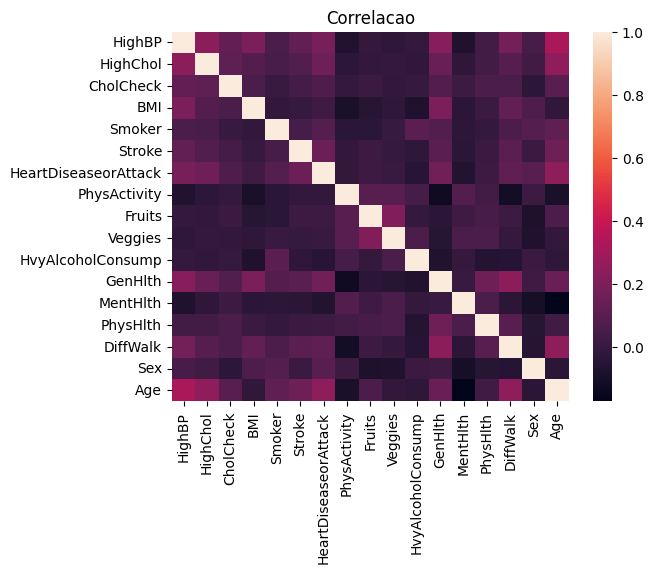

In [29]:
# cria um mapa de cores dos valores da correlação
sns.heatmap(df_correlation,
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Correlacao')
plt.show()

In [36]:
df.to_csv('diabetes_indicator_preprocessed.csv', index=False)

Até essa parte é feito o pre-processamento dos dados e salvando eles em um novo arquivo csv. A partir de agora é realizado o treinamento utilizando o arquivo

# Treinamento

## Informações

In [30]:
# Dimensão
print(df.shape)

(116456, 18)


In [38]:
# Resumo estatístico
print(df.describe())

              HighBP       HighChol      CholCheck            BMI  \
count  116456.000000  116456.000000  116456.000000  116456.000000   
mean        0.429330       0.427853       0.942553      -0.133074   
std         0.494983       0.494769       0.232695       0.763399   
min         0.000000       0.000000       0.000000      -2.347466   
25%         0.000000       0.000000       1.000000      -0.703819   
50%         0.000000       0.000000       1.000000      -0.292908   
75%         1.000000       1.000000       1.000000       0.391945   
max         1.000000       1.000000       1.000000       2.035591   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  116456.000000  116456.000000         116456.000000  116456.000000   
mean        0.455812       0.043673              0.098879       0.731160   
std         0.498046       0.204368              0.298500       0.443358   
min         0.000000       0.000000              0.000000       0.000000  

In [39]:
# Distribuição de classe
print(df.groupby('Diabetes_binary').size())

Diabetes_binary
0.0    102574
1.0     13882
dtype: int64


## Visualização dos dados

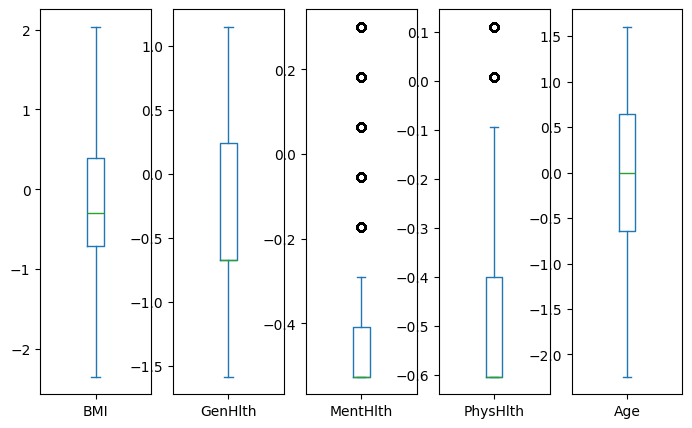

In [31]:
# Gráfico de box and whisker
df[continuous_cols].plot(kind='box', subplots=True, layout=(1,6), sharex=False, sharey=False, figsize=(10,5))
plt.show()

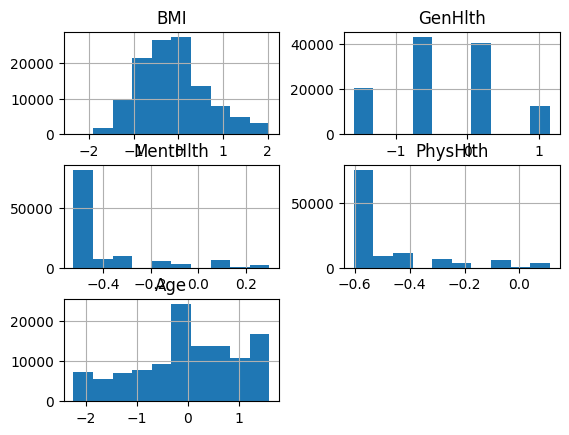

In [58]:
# Histograma
df[continuous_cols].hist() 
plt.show()

## Criar conjunto de validação

In [32]:
# Define X como todas as colunas, exceto a coluna "Diabetes_binary"
X = df.drop(columns=['Diabetes_binary']).values

# Define Y como a coluna "Diabetes_binary"
Y = df['Diabetes_binary'].values

# Divide o conjunto em treinamento e validação
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print(f'X_train: {X_train.shape}')
print(f'Y_train: {Y_train.shape}')

print(f'X_validation: {X_validation.shape}')
print(f'Y_validation: {Y_validation.shape}')

X_train: (93164, 17)
Y_train: (93164,)
X_validation: (23292, 17)
Y_validation: (23292,)


Aqui foi separado 93164 amostras para treinamento e 23292 para validação

In [33]:
# Métricas
seed = 7
scoring = 'accuracy'

## Treinamento dos modelos

- Regressão Logística (LR)
- Análise Linear Discriminante (LDA)
- K-vizinhos mais próximos (KNN)
- Árvores de Classificação (Decision Tree) e Regressão (CART)
- Gaussian Naive Bayes (NB)
- Support Vector Machines (SVM)

In [35]:
# Algoritmos
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Avaliação de cada modelo
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.881413 (0.002290)
LDA: 0.879299 (0.002580)
KNN: 0.867524 (0.002711)
CART: 0.812202 (0.003126)
NB: 0.782491 (0.003891)
SVM: 0.880823 (0.003006)


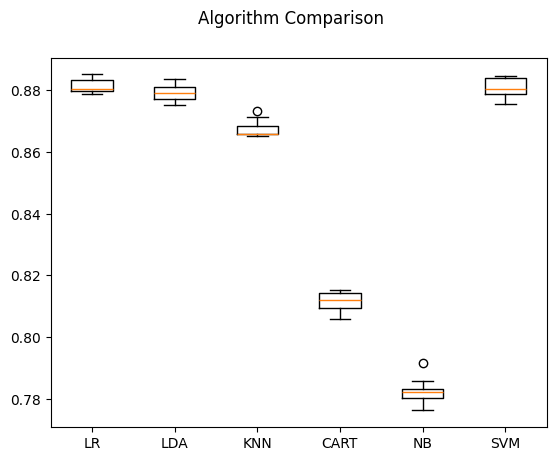

In [63]:
# Comparação dos Algoritmos
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# LR
# Precisão do modelo no conjunto de validação
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8818907779495105
[[20232   281]
 [ 2470   309]]
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     20513
         1.0       0.52      0.11      0.18      2779

    accuracy                           0.88     23292
   macro avg       0.71      0.55      0.56     23292
weighted avg       0.85      0.88      0.85     23292



In [65]:
# LDA
# Precisão do modelo no conjunto de validação
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8800017173278378
[[20135   378]
 [ 2417   362]]
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.94     20513
         1.0       0.49      0.13      0.21      2779

    accuracy                           0.88     23292
   macro avg       0.69      0.56      0.57     23292
weighted avg       0.84      0.88      0.85     23292



In [66]:
# KNN
# Precisão do modelo no conjunto de validação
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8674652241112828
[[19730   783]
 [ 2304   475]]
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93     20513
         1.0       0.38      0.17      0.24      2779

    accuracy                           0.87     23292
   macro avg       0.64      0.57      0.58     23292
weighted avg       0.83      0.87      0.84     23292



In [67]:
# CART
# Precisão do modelo no conjunto de validação
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8126824660827752
[[18103  2410]
 [ 1953   826]]
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89     20513
         1.0       0.26      0.30      0.27      2779

    accuracy                           0.81     23292
   macro avg       0.58      0.59      0.58     23292
weighted avg       0.83      0.81      0.82     23292



In [68]:
# NB
# Precisão do modelo no conjunto de validação
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7822857633522239
[[16589  3924]
 [ 1147  1632]]
              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87     20513
         1.0       0.29      0.59      0.39      2779

    accuracy                           0.78     23292
   macro avg       0.61      0.70      0.63     23292
weighted avg       0.86      0.78      0.81     23292



In [ ]:
#SVC
svc = SVC(gamma='auto')
svc.fit(X_train, Y_train)
predictions = svc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions, zero_division=0))

0.8806886484629916
[[20513     0]
 [ 2779     0]]
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94     20513
         1.0       0.00      0.00      0.00      2779

    accuracy                           0.88     23292
   macro avg       0.44      0.50      0.47     23292
weighted avg       0.78      0.88      0.82     23292



Concluímos que a melhor resultado foi obtido com o modelo LR

### Exportação do modelo

In [36]:
# Salva o treinamento em um arquivo pkl 

# Diretório para salvar os modelos
output_dir = "modelos_treinados"
os.makedirs(output_dir, exist_ok=True)

# Salvamento dos modelos treinados
for name, model in models:

    model.fit(X_train, Y_train)

    # Nome do arquivo baseado no modelo
    model_path = os.path.join(output_dir, f"{name}.pkl")
    
    # Salva o modelo treinado
    joblib.dump(model, model_path)
    print(f"Modelo {name} salvo")

Modelo LR salvo
Modelo LDA salvo
Modelo KNN salvo
Modelo CART salvo
Modelo NB salvo
Modelo SVM salvo


---

## Validação

In [ ]:
# Vamos inserir uma entrada como se fosse os dados passados por um usuário

entradas = [
  1.0, 1.0, 1.0, 40.0, 1.0, 0.0,
  0.0, 0.0, 0.0, 1.0,
  0.0, 5.0, 18.0, 15.0,
  1.0, 0.0, 9.0
]

In [ ]:
# Salvar essas entradas em um arquivo com dados sem normalizar
dados = pd.read_csv(f'./diabetes_indicator_preprocessed_parametros.csv', sep=',')

dados = pd.concat([dados, pd.DataFrame([entradas], columns=dados.columns)], ignore_index=True)
dados

HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0     1.0       0.0        1.0  27.0     0.0     0.0                   0.0   
1     1.0       1.0        1.0  24.0     0.0     0.0                   0.0   
2     1.0       1.0        1.0  25.0     1.0     0.0                   0.0   
3     0.0       0.0        1.0  24.0     0.0     0.0                   0.0   
4     1.0       1.0        1.0  26.0     1.0     0.0                   0.0   
5     1.0       1.0        1.0  40.0     1.0     0.0                   0.0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0           1.0     1.0      1.0                0.0      2.0       0.0   
1           1.0     1.0      1.0                0.0      2.0       3.0   
2           1.0     1.0      1.0                0.0      2.0       0.0   
3           0.0     0.0      1.0                0.0      2.0       0.0   
4           1.0     1.0      1.0                1.0      3.0       3.0   
5           0.0     0.0      1.0                0.0      5.0      18.0   

   PhysHlth  DiffWalk  Sex   Age  
0       0.0       0.0  0.0  11.0  
1       0.0       0.0  0.0  11.0  
2       2.0       0.0  1.0  10.0  
3       0.0       0.0  1.0   8.0  
4       0.0       0.0  1.0   9.0  
5      15.0       1.0  0.0   9.0

Vamos normalizar agora o arquivo juntamente com a entrada passada

In [57]:
continuous_cols = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age']

In [58]:
def normalizar(X):
   """
   Normaliza os atributos em X

   Esta função retorna uma versao normalizada de X onde o valor da
   média de cada atributo é igual a 0 e desvio padrao é igual a 1. Trata-se de
   um importante passo de pré-processamento quando trabalha-se com
   métodos de aprendizado de máquina.
   """

   m, n = X.shape # m = qtde de objetos e n = qtde de atributos por objeto

   # Incializa as variaves de saída
   X_norm = np.random.rand(m,n) # inicializa X_norm com valores aleatórios
   mu = 0 # inicializa a média
   sigma = 1 # inicializa o desvio padrão

   mu = np.mean(X, axis=0)
   sigma = np.std(X, axis=0, ddof=1)

   for i in range(m):
       X_norm[i,:] = (X[i,:]-mu) / sigma


   return X_norm, mu, sigma


# coloca os valores dos atributos na variável X
X = dados[continuous_cols].values # Extrai valores das colunas contínuas para normalização

# chama a função para normalizar X
X_norm, mu, sigma = normalizar(X)

dados[continuous_cols] = X_norm # Atualiza as colunas contínuas no DataFrame original com os valores normalizados
print(dados)

   HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0     1.0       0.0        1.0 -0.108338     0.0     0.0   
1     1.0       1.0        1.0 -0.595858     0.0     0.0   
2     1.0       1.0        1.0 -0.433351     1.0     0.0   
3     0.0       0.0        1.0 -0.595858     0.0     0.0   
4     1.0       1.0        1.0 -0.270845     1.0     0.0   
5     1.0       1.0        1.0  2.004250     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           1.0     1.0      1.0                0.0   
1                   0.0           1.0     1.0      1.0                0.0   
2                   0.0           1.0     1.0      1.0                0.0   
3                   0.0           0.0     0.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                1.0   
5                   0.0           0.0     0.0      1.0                0.0   

    GenHlth  MentHlth  PhysHlth  DiffWa

In [74]:
# Transfere os dados para um array
array = dados.values
entrada_normalizada = array[:,0:17]

print(entrada_normalizada)

[[ 1.          0.          1.         -0.10833785  0.          0.
   0.          1.          1.          1.          0.         -0.55048188
  -0.57026595 -0.4711329   0.          0.          1.10096377]
 [ 1.          1.          1.         -0.59585816  0.          0.
   0.          1.          1.          1.          0.         -0.55048188
  -0.14256649 -0.4711329   0.          0.          1.10096377]
 [ 1.          1.          1.         -0.43335139  1.          0.
   0.          1.          1.          1.          0.         -0.55048188
  -0.57026595 -0.1385685   0.          1.          0.27524094]
 [ 0.          0.          1.         -0.59585816  0.          0.
   0.          0.          0.          1.          0.         -0.55048188
  -0.57026595 -0.4711329   0.          1.         -1.37620471]
 [ 1.          1.          1.         -0.27084462  1.          0.
   0.          1.          1.          1.          1.          0.27524094
  -0.14256649 -0.4711329   0.          1.       

In [75]:
# Realiza a previsão
lr_model = joblib.load('./modelos_treinados/LR.pkl')
previsao = lr_model.predict(entrada_normalizada)
print("Previsão de diabetes:", previsao)

Previsão de diabetes: [0. 0. 0. 0. 0. 1.]


Podemos verificar a entrada passada que seria a ultima que deu positivo para possivel diabetes